## Day 6

In [1]:
puzzle = """45, 315
258, 261
336, 208
160, 322
347, 151
321, 243
232, 148
48, 202
78, 161
307, 230
170, 73
43, 73
74, 248
177, 296
330, 266
314, 272
175, 291
75, 142
278, 193
279, 337
228, 46
211, 164
131, 100
110, 338
336, 338
231, 353
184, 213
300, 56
99, 231
119, 159
180, 349
130, 193
308, 107
140, 40
222, 188
356, 44
73, 107
304, 313
199, 238
344, 158
49, 225
64, 117
145, 178
188, 265
270, 215
48, 181
213, 159
174, 311
114, 231
325, 162""".splitlines()

##### Part 1

In [51]:
from collections import defaultdict
from itertools import product


def manhattan_distance(c1, c2):
    return abs(c1[0] - c2[0]) + abs(c1[1] - c2[1])


coordinates = [tuple(map(int, x.split(", "))) for x in puzzle]
grid = defaultdict(set)

min_x = min(coordinates, key=lambda x: x[0])[0]
min_y = min(coordinates, key=lambda x: x[1])[1]
max_x = max(coordinates, key=lambda x: x[0])[0]
max_y = max(coordinates, key=lambda x: x[1])[1]

x_range = list(range(min_x, max_x + 1))
y_range = list(range(min_y, max_y + 1))

x_count = len(x_range)
y_count = len(y_range)

for i, destination_coords in enumerate(coordinates):
    for coords in product(x_range, y_range):
        grid[coords].add((i, manhattan_distance(destination_coords, coords)))

In [52]:
def min_with_ties(iterable, key):
    real_min = min(iterable, key=key)
    return [x[0] for x in iterable if key(x) == key(real_min)]

# Calculate border coordinate areas
border_coords = set()

for c in x_range:
    border_coords |= set(min_with_ties(grid[(c, min_y)], key=lambda x: x[1]))
    border_coords |= set(min_with_ties(grid[(c, max_y)], key=lambda x: x[1]))

for c in y_range:
    border_coords |= set(min_with_ties(grid[(min_x, c)], key=lambda x: x[1]))
    border_coords |= set(min_with_ties(grid[(max_x, c)], key=lambda x: x[1]))
    
area_sizes = dict()

for coord in grid:
    closest_coord = min_with_ties(grid[coord], key=lambda x: x[1])
    
    if len(closest_coord) > 1:
        continue
    
    closest_coord = closest_coord[0]
    if closest_coord not in border_coords:
        area_sizes[closest_coord] = area_sizes.get(closest_coord, 0) + 1


largest_area_coord = max(area_sizes, key=area_sizes.get)
print("The largest area is {} for {}".format(area_sizes[largest_area_coord], largest_area_coord))

The largest area is 3894 for 10


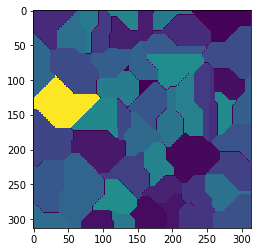

In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matrix = np.zeros([max_x - min_x, max_y - min_y])
for c in product(x_range, y_range):
    mini = min_with_ties(grid[c], key=lambda x: x[1])
    
    if len(mini) > 1:
        value = -1
    else:
        value = mini[0]

    if value == 10:
        value = 100
        
    matrix[c[0] - min_x - 1, c[1] - min_y - 1] = value
    
fig, ax = plt.subplots()
im = ax.imshow(matrix)

##### Part 2

39398


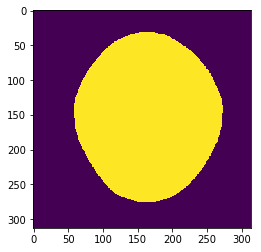

In [58]:
matrix = np.zeros([max_x - min_x, max_y - min_y])
for c in product(x_range, y_range):
    
    total_distance = sum(map(lambda x: manhattan_distance(x, c), coordinates))
    
    value = total_distance < 10000
        
    matrix[c[0] - min_x - 1, c[1] - min_y - 1] = value
    
print(np.sum(matrix == True))    

fig, ax = plt.subplots()
im = ax.imshow(matrix)